## Box plots for ``natural diversity''¶

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8 # that's default image size for this interactive session

In [2]:
from sample_reader.sample_reader import SampleReader

In [3]:
samples_fv = SampleReader().read('AbVitro/flu_time_course/FV/', ['25'])
samples_gmc = SampleReader().read('AbVitro/flu_time_course/GMC/', ['8'])
samples_ido = SampleReader().read('AbVitro/flu_time_course/IDO/')
samples_age = SampleReader().read('age/')
samples_paired = SampleReader().read('AbVitro/paired/')

In [4]:
import spots.spots as spots

hotspots, coldspots = spots.hotspots(), spots.coldspots()
hotspots_ind, coldspots_ind = spots.hotspots_indexes(), spots.coldspots_indexes()

In [5]:
import numpy as np

In [13]:
def get_samples(chain_type='IGH', strategy='NoKNeighbours'):
    result = np.concatenate((samples_fv[strategy][chain_type],
                             samples_ido[strategy][chain_type],
                             samples_gmc[strategy][chain_type],
                             samples_paired[strategy][chain_type]))
    if chain_type != 'IGH':
        return result
    else:
        return np.concatenate((result, samples_age[strategy][chain_type]))

In [14]:
from calculate_mutability_diversity import *
import kmer_utilities.kmer_utilities as kmer_utilities

In [15]:
def get_spot_colors(hotspot_color, coldspot_color):
    colors = np.array(['black'] * 1024)
    colors[spots.hotspots_indexes()] = hotspot_color
    colors[spots.coldspots_indexes()] = coldspot_color
    return colors

In [145]:
def draw_diversity_graph(samples, coverage_threshold=100, mean_function=np.median, threshold_function=np.min,
                         use_spots=True, hotspot_color='red', coldspot_color='blue',
                         diversity_function=calculate_mutability,
                         #kmers_to_show=kmer_utilities.kmer_names(),
                         font_scale=1, output_pdf=None):
    if use_spots:
        colors = get_spot_colors(hotspot_color, coldspot_color)
    
    coverage = mean_function(threshold_function(samples, 2), 0)
    ind_coverage = coverage > coverage_threshold
      
    mutability_diversity, sorted_ind = calculate_mutability_diversity(samples, diversity_function, ind_coverage)

    g = sns.boxplot(mutability_diversity.T)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    sns.set_context("poster")
    sns.set(font_scale=font_scale) 
    if use_spots:
        [t.set_color(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.xaxis.get_ticklabels())]
        [t.set_facecolor(i) for (i,t) in zip(colors[ind_coverage][sorted_ind], g.artists)]
    
    if output_pdf is not None:
        plt.rcParams['figure.figsize'] = 12, 8
        g.get_figure().savefig(output_pdf)

In [144]:
draw_diversity_graph(get_samples(), coverage_threshold=70000, mean_function=np.median, threshold_function=np.max,
                     diversity_function=calculate_mutability,
                     font_scale=1.05,
                     output_pdf='/Users/andrewbzikadze/Yandex.Disk.localized/Documents/lab/lab_publications/immunogenomics/antevolo/figures/shm_model/mutability_diversity.pdf')

TypeError: get_spot_colors() takes exactly 2 arguments (0 given)

/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


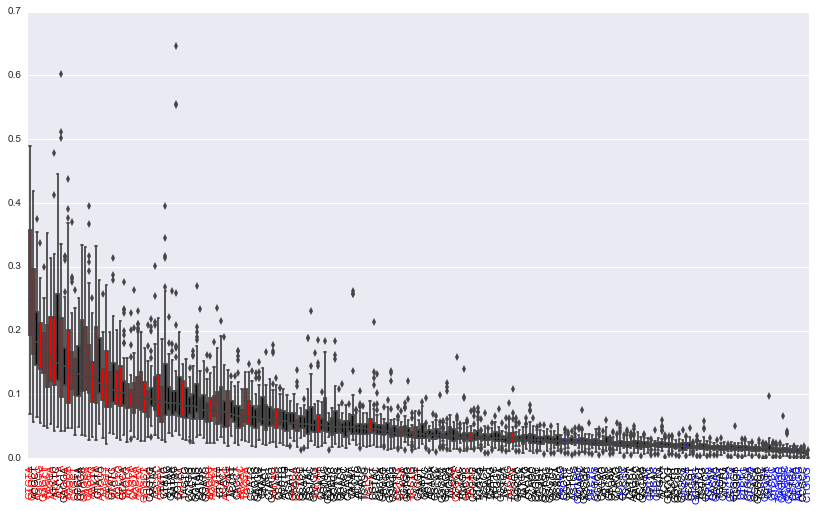

In [148]:
draw_diversity_graph(get_samples(), #coverage_threshold=70000, mean_function=np.median, threshold_function=np.max,
                     diversity_function=calculate_mutability,
                     font_scale=1.05)
                     #output_pdf='/Users/andrewbzikadze/Yandex.Disk.localized/Documents/lab/lab_publications/immunogenomics/antevolo/figures/shm_model/mutability_diversity.pdf')

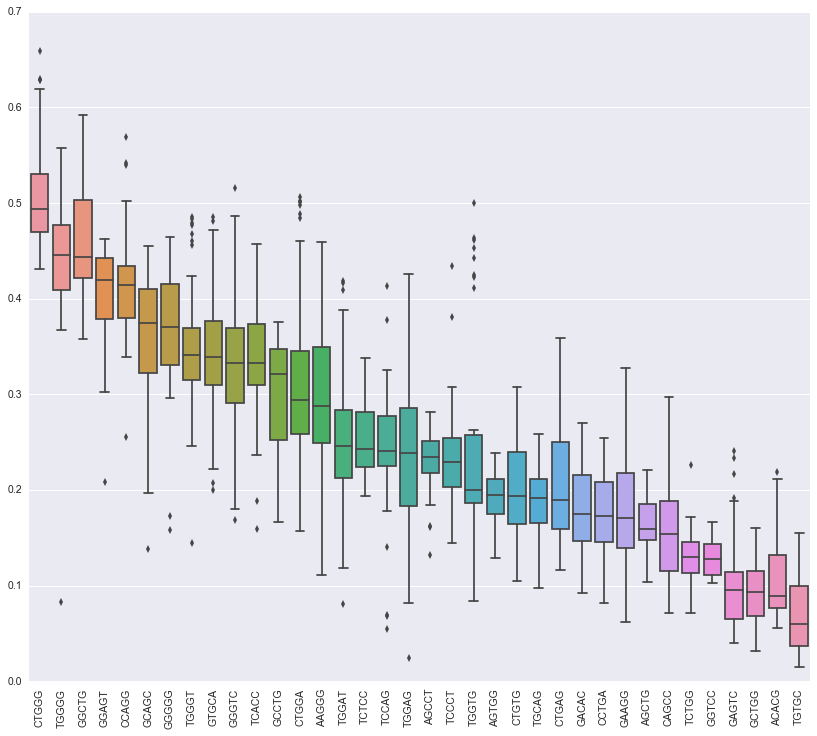

In [78]:
draw_diversity_graph(get_samples(), coverage_threshold=70000, mean_function=np.median, threshold_function=np.max,
                     diversity_function=calculate_substitution_1, use_spots=False)

# Spots in Yale model

In [86]:
import pandas as pd

In [184]:
yale_mutability = pd.read_csv('yale_model/Mutability.csv', sep=' ')
yale_mutability.sort_values('Fivemer', inplace=True, ascending=True)
yale_mutability = yale_mutability.set_index(np.arange(yale_mutability.shape[0]))
measured_ind = np.where(yale_mutability['Source'] == 'Inferred')[0]
yale_mutability = yale_mutability.ix[measured_ind, :]
yale_mutability = yale_mutability.ix[np.arange(0, yale_mutability.shape[0], 2), :]
yale_mutability.sort_values('Mutability', inplace=True, ascending=False)
#yale_mutability

In [185]:
fivemer_indexes = yale_mutability.index

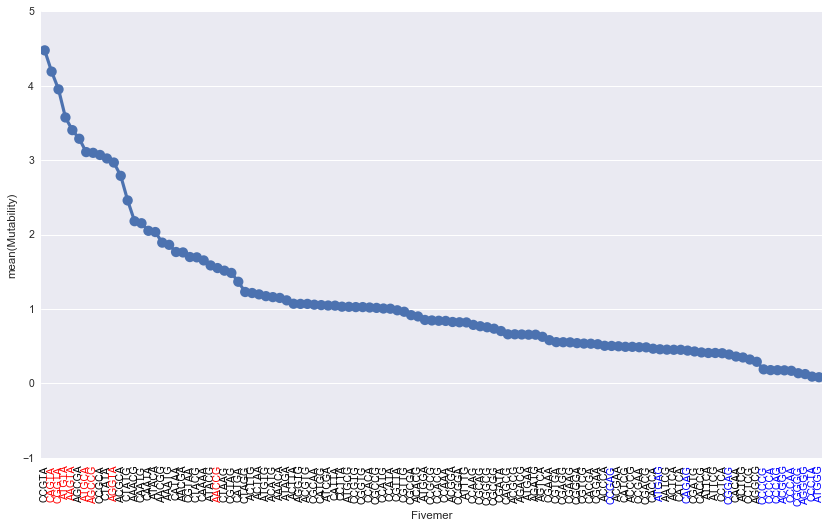

In [186]:
plt.rcParams['figure.figsize'] = 14, 8 # that's default image size for this interactive session
colors=get_spot_colors("red", "blue")
g = sns.pointplot(x="Fivemer", y="Mutability", data=yale_mutability)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)
_ = [t.set_color(i) for (i,t) in zip(colors[fivemer_indexes], g.xaxis.get_ticklabels())]
#[t.set_facecolor(i) for (i,t) in zip(colors[yale_mutability["Fivemer"].index]), g.artists]

In [189]:
yale_mutability

,Fivemer,Mutability,Source,lower25,upper25
364,CCGTA,4.476257,Inferred,3.879660,5.348561
300,CAGTA,4.190886,Inferred,3.311962,5.327941
428,CGGTA,3.952262,Inferred,2.999891,5.148066
236,ATGTA,3.574432,Inferred,2.940802,4.428223
44,AAGTA,3.403951,Inferred,2.879759,4.137804
152,AGCGA,3.288274,Inferred,2.742019,4.037066
228,ATGCA,3.109062,Inferred,2.601937,3.807685
150,AGCCG,3.099082,Inferred,2.442692,3.946355
356,CCGCA,3.070419,Inferred,2.496389,3.833568
460,CTATA,3.023322,Inferred,2.649355,3.583506
